<http://www.atmarkit.co.jp/ait/articles/1310/02/news006.html>
# 学習塾を運営するのに最適なのはどこ？ オープンデータを活用して実践的なスキルを身に付ける (1/3)
No5とNo6の間の特別編
政府や行政が主導して国内でも環境が整いつつあるオープンデータの活用。今回は特別編として、オープンデータを活用した実践的な分析を展開します。

データの統合や変換、クレンジングを行なう練習

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')


In [2]:
# csvから読み直して確認
dfall = pd.read_csv('data/all_tyo.csv', names=['year', 'month', 'ward', 'town', 'gender', 'age', 'num'], encoding='UTF-8')
dfall.count()


year      2156552
month     2156552
ward      2156552
town      2156552
gender    2156552
age       2156552
num       2156552
dtype: int64

中学生向けの高校受験の塾を千葉市内で展開する際にどの区がよいのかを検討するために、今後10年間の区毎の中学生の推移を知りたいとしましょう。今回整備したデータを使って簡易的な人口推定を行うことで今後の中学生の人口推移を知ることが可能です。

2013年は13歳から15歳が中学生ですが、
2014年では2013年に12歳から14歳が中学生です。このように1年ごとに1歳ずつスライドさせて計算していくと、今後10年間の中学生の数を簡易的に推定することができます。“簡易的”というのは他からの転入や転出、出生率や死亡率を加味していないからです。

In [3]:
#中学生の人数を算出し格納するための空のデータフレームを作成
df = pd.DataFrame(columns=['year', 'group', 'ward', 'num'])
dfwork = pd.DataFrame(columns=['year', 'group', 'ward', 'num'])

In [4]:
# 年度ごとの中学生人数を算出
for i in range(0, 10):
    # 区ごとの指定した年度別の中学生（12〜14歳）の人数予測値を算出
    calc = dfall[(dfall.year == 2015) & (dfall.age >= 12 - i) & (dfall.age <= 12+2-i)].groupby(['ward'])['num'].sum()
    dfwork.ward = calc.index
    dfwork.num = calc.values
    dfwork.year = 2015+i
    dfwork.group = '中学生'
    df = pd.concat([df, dfwork])

In [5]:
df.head(10)

,year,group,ward,num
0,2015,中学生,中央区,5174
1,2015,中学生,稲毛区,4323
2,2015,中学生,緑区,4388
3,2015,中学生,美浜区,4803
4,2015,中学生,花見川区,4870
5,2015,中学生,若葉区,4010
0,2016,中学生,中央区,5077
1,2016,中学生,稲毛区,4322
2,2016,中学生,緑区,4351
3,2016,中学生,美浜区,4641


In [6]:
#ピボットテーブルに変換
# インデックスはyear。 列は区。年度別区別の中学生の人数
dfpivot = pd.pivot_table(df, values='num', index='year', columns='ward', aggfunc=sum, fill_value=0)
dfpivot

ward,中央区,稲毛区,緑区,美浜区,花見川区,若葉区
year,,,,,,
2015,5174,4323,4388,4803,4870,4010
2016,5077,4322,4351,4641,4782,3974
2017,5033,4346,4347,4517,4655,3862
2018,4982,4289,4185,4359,4491,3701
2019,4994,4314,4124,4396,4396,3598
2020,5096,4291,4040,4385,4233,3546
2021,5115,4257,4074,4378,4146,3558
2022,5176,4180,3988,4180,4054,3528
2023,5115,4136,3883,4008,4051,3508


([<matplotlib.axis.XTick at 0x7f64a4895710>,
 <a list of 10 Text xticklabel objects>)

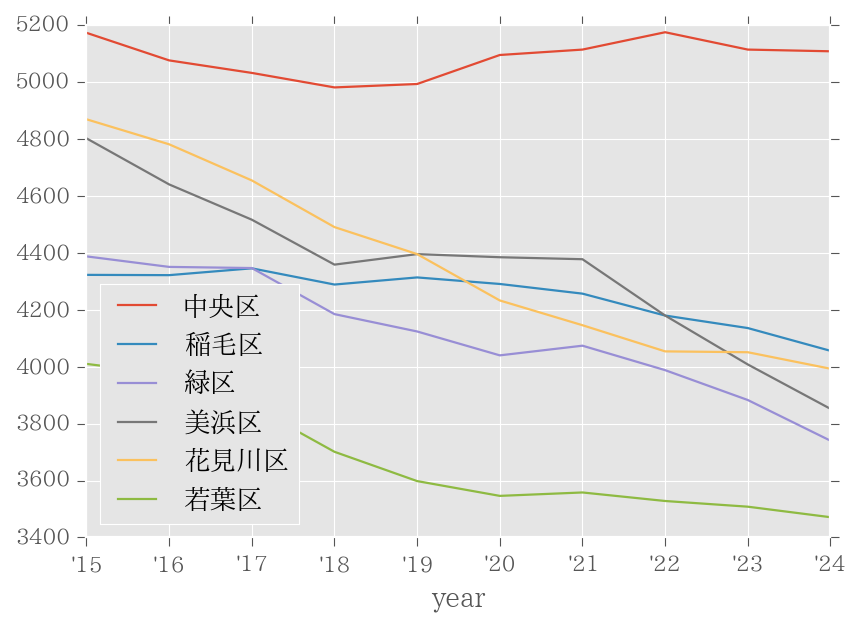

In [7]:
# グラフをプロットする
dfpivot.plot()
plt.legend(loc='lower left')
plt.xticks(range(2015, 2025), ["'"+str(n-2000) for n  in range(2015, 2025)])   #x軸のラベル修正